In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import InMemorySaver

from typing import TypedDict
from dotenv import load_dotenv

import time

In [2]:
### Define state

class CrashState(TypedDict):
    input:str
    step1:str
    step2:str
    step3:str

### Get functions

In [3]:
def step_1(state:CrashState)->CrashState:
    print("Step 1 executed")
    return {'step1':'done','input':state['input']}

def step_2(state:CrashState)->CrashState:
    print("Step 2 hanging... now manually interrupt from the notebook toolbar (Stop Button)")
    time.sleep(30)
    return {'step2':'done'}

def step_3(state:CrashState)->CrashState:
    print("Step 3 executed")
    return {'step3':'done'}

#### Build the graph

In [4]:
graph = StateGraph(CrashState)

graph.add_node('step_1',step_1)
graph.add_node('step_2',step_2)
graph.add_node('step_3',step_3)

graph.add_edge(START,'step_1')
graph.add_edge('step_1','step_2')
graph.add_edge('step_2','step_3')
graph.add_edge('step_3',END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

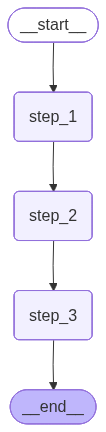

In [5]:
workflow

In [7]:
try:
    print("Running the graph: Please Manually interupt at step2")
    workflow.invoke({"input":"start"},config={'configurable':{'thread_id':1}})
except KeyboardInterrupt:
    print('Kernel manually interrupted')

Running the graph: Please Manually interupt at step2
Step 1 executed
Step 2 hanging... now manually interrupt from the notebook toolbar (Stop Button)
Kernel manually interrupted


In [9]:
workflow.get_state(config={'configurable':{'thread_id':1}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0ce5-e445-66c0-8004-a4165600e382'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2025-12-24T13:42:19.790713+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0ce5-e445-66bf-8003-b262dd6f1fd7'}}, tasks=(PregelTask(id='4006f6cb-460a-119a-4d07-d9bfe3bdf353', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [10]:
list(workflow.get_state_history(config={'configurable':{'thread_id':1}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0ce5-e445-66c0-8004-a4165600e382'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2025-12-24T13:42:19.790713+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0ce5-e445-66bf-8003-b262dd6f1fd7'}}, tasks=(PregelTask(id='4006f6cb-460a-119a-4d07-d9bfe3bdf353', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_1',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0ce5-e445-66bf-8003-b262dd6f1fd7'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-12-24T13:42:19.790713+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id

### Rerun the workflow to show the fault tolerance resume

In [11]:
workflow.invoke(None,config={'configurable':{'thread_id':1}})

Step 2 hanging... now manually interrupt from the notebook toolbar (Stop Button)
Step 3 executed


{'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}

In [12]:
workflow.get_state(config={'configurable':{'thread_id':1}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0cf0-724a-64b1-8006-99e5549fab8b'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2025-12-24T13:47:03.117944+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0cf0-7248-6f70-8005-19ce1d04393b'}}, tasks=(), interrupts=())